In [1]:
import numpy as np

from gscore.fdr import GlobalDistribution

In [24]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/protein.test"

In [25]:
global_model = GlobalDistribution.load(model_path)

In [26]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

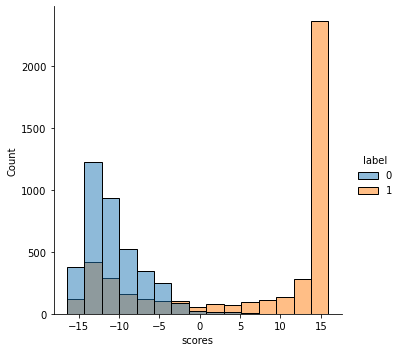

In [27]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [28]:
decoy_values = check[check["scores"] >= 0.50]["label"].value_counts()

In [29]:
decoy_values[0] / decoy_values[1]

0.012384884090187362

In [30]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [31]:
function_check

,label,scores,type
0,-16.461004,0.000764,Target
1,-16.428568,0.000879,Target
2,-16.396133,0.001000,Target
3,-16.363697,0.001119,Target
4,-16.331261,0.001243,Target
...,...,...,...
995,15.812642,0.323653,Target
996,15.845078,0.322736,Target
997,15.877513,0.322125,Target
998,15.909949,0.320788,Target


In [32]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

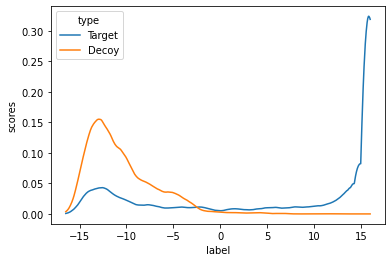

In [33]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [34]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.        , 0.        , 0.        , ..., 0.00034488, 0.00175193,
       0.00587984])